In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn as sns
#Pueden importar las librerías de gráficos que quieran.

pd.options.display.float_format = '{:,.2f}'.format

## Archivos proporcionados

En el primer archivo "operaciones.csv" están las operaciones realizadas por los clientes (identificados por la columna CODCLAVECIC), la cantidad de dólares cambiados y el precio al que se cambiaron. **Además contiene la fecha y hora en la que se realizó cada operación.**

El segundo archivo "segmentos.xlsx" contiene la información de a qué SEGMENTO pertenece cada cliente de la tabla "operaciones.csv".

El tercer archivo "vinculacion.parquet" contiene un indicador del nivel de vinculacion del cliente con el BCP que se actualiza todos los meses.

## Ejercicio 1

#### Parte 1:

a) Lea los archivos proporcionados.

b) Calcule (i) la cantidad total y (ii) el ingreso promedio para cada segmento de clientes (Hint: el ingreso se calcula como PxQ).

Los clientes de la tabla "operaciones.csv" que NO aparecen en la tabla de "segmentos.xlsx" son "NO SEGMENTADOS".
 

#### Parte 2:

c) Calcule la cantidad total MENSUAL para clientes con "SoW" mayor a 60%

Considere que el "SoW" mostrado en la tabla "vinculacion.parquet" se actualiza cada mes para cada cliente.

d) Realice un gráfico sencillo que muestre sus resultados. (En caso utilice librerías, puede utilizar la de su preferencia).

## Ejercicio 2

#### Parte 1:

a) Cree una función que calcule el VAN, a partir de un vector de "flujos de caja" y una tasa de descuento. Su función debe funcionar para vectores de diferentes dimensiones.

La fórmula de VAN está dada por:

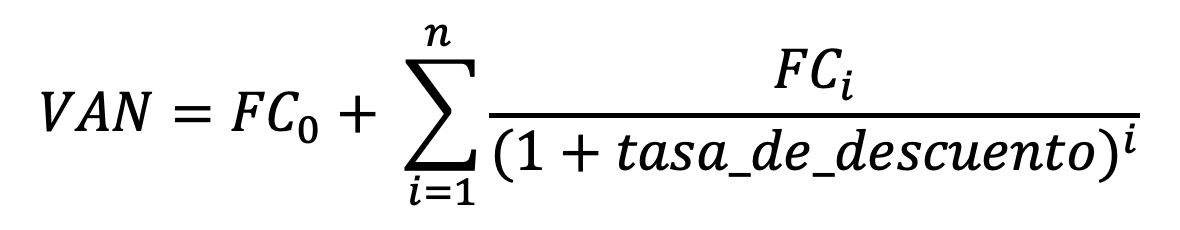

In [ ]:
#Proyecto de ejemplo:

vector_de_flujos = [-1900, 255, 227, 250, 158, 298, 199, 150, 169, 278, 188]
tasa_de_descuento = 0.0146
segmento = "CONSUMO"

#### Parte 2:

b) Cree una función que señale si debemos aprobar un crédito, a partir de un vector de "flujos de caja" y el segmento del cliente. (Hint: utilice sus conocimientos financieros para definir el criterio a partir del valor del VAN).

Considere que los segmentos "BEX" y "ENALTA" tienen una tasa de descuento de 0.0122; y el segmento "CONSUMO" de 0.0146

#### Parte 3:

c) Cree un vector de tasas entre 0% (0.0000) y 5% (0.0500) con incrementos de 10 puntos básicos entre ellas (Hint: 1 punto básico es igual a 0.0001).

d) A partir de la función de la pregunta (a) y el vector de la pregunta (c); cree un gráfico que muestre la relación entre la tasa de descuento y el VAN. Use el proyecto de ejemplo en su respuesta. (En caso utilice librerías, puede utilizar la de su preferencia).

#### Parte 4:

e) La TIR se define como la tasa de descuento que hace que el VAN sea igual a cero. Aproximadamente, ¿cuál sería la TIR del proyecto de ejemplo? (Hint: puede apoyarse en el gráfico de la pregunta (c)).

f) Cree una función que _aproxime_ la TIR, a partir de un vector de "flujos de caja". En esta pregunta hay libertad creativa; puede incluir más argumentos en su función si lo considera necesario. Indique las limitaciones de su función. (Hint: no necesita usar librerías de optimización).